<a href="https://colab.research.google.com/github/wingated/cs473/blob/main/mini_labs/week_6_kldiv.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BYU CS 473 — KL Divergence

In this assignment, you will learn the basics of **Kullback–Leibler (KL) divergence**. KL divergence measures how one probability distribution differs from another.

---

## Learning Goals
- Understand the definition of KL divergence  
- Compute KL divergence between two Gaussian distributions  
- Understand why KL divergence is always non-negative  
- Relate KL divergence to Maximum Likelihood Estimation (MLE)  
- Compare forward vs reverse KL divergence


## 1. Definition

For discrete distributions:

$D_{\text{KL}}(P \,\|\, Q) = \sum_x P(x) \log \frac{P(x)}{Q(x)}$

For continuous distributions:

$D_{\text{KL}}(P \,\|\, Q) = \int p(x) \log \frac{p(x)}{q(x)} dx$

- KL divergence is **not symmetric**: $D_{\text{KL}}(P \,\|\, Q) \neq D_{\text{KL}}(Q \,\|\, P)$
- KL divergence is **not a distance metric**, but it measures how well $Q$ approximates $P$.  


### Exercise 1
In your own words, explain what KL divergence measures.  
Give a real-world analogy (e.g., communication, language modeling).


KL Divergence measures how well knowing something about x tells you something about y. For example, being a student at BYU suggests that you are likely LDS (Low KL). However, being LDS does not necessitate that you are a student at BYU (High KL).

## 2. Example: KL Divergence Between Two Gaussians

If $P = \mathcal{N}(\mu_p, \sigma_p^2)$ and $Q = \mathcal{N}(\mu_q, \sigma_q^2)$, the KL divergence is:

$D_{\text{KL}}(P \,\|\, Q) = \log \frac{\sigma_q}{\sigma_p} + \frac{\sigma_p^2 + (\mu_p - \mu_q)^2}{2\sigma_q^2} - \frac{1}{2}$


In [12]:
import numpy as np

def kl_gaussian(mu_p, sigma_p, mu_q, sigma_q):
    return np.log(sigma_q/sigma_p) + (sigma_p**2 + (mu_p - mu_q)**2)/(2*sigma_q**2) - 0.5

# Example
print("KL(P||Q) with mu_p=0, sigma_p=1, mu_q=1, sigma_q=2:")
kl_gaussian(0, 1, 1, 2)

KL(P||Q) with mu_p=0, sigma_p=1, mu_q=1, sigma_q=2:


np.float64(0.4431471805599453)

### Exercise 2
- Compute ${\text{KL}}(P \,\|\, Q)$ for several pairs of Gaussian distributions.  
- Which matters more: differences in mean, or differences in variance?  
- Plot ${\text{KL}}(P \,\|\, Q)$ as $μ_q$ varies from -3 to 3, holding σ fixed.


In [6]:
pairs = [(0, 1, 0, 1), (0, 1, 1, 1), (0, 1, 0, 2), (0, 2, 0, 1), (1, 2, -1, 1), (0, 0.5, 2, 1)]

for i in range(len(pairs)):
  mu_p, sigma_p, mu_q, sigma_q = pairs[i]
  print("KL(P||Q) with mu_p= " + str(mu_p) + ", sigma_p= " + str(sigma_p) + ", mu_q= " + str(mu_q) + ", sigma_q= " + str(sigma_q) + ":")
  print(kl_gaussian(mu_p, sigma_p, mu_q, sigma_q))
  print()

KL(P||Q) with mu_p= 0, sigma_p= 1, mu_q= 0, sigma_q= 1:
0.0

KL(P||Q) with mu_p= 0, sigma_p= 1, mu_q= 1, sigma_q= 1:
0.5

KL(P||Q) with mu_p= 0, sigma_p= 1, mu_q= 0, sigma_q= 2:
0.3181471805599453

KL(P||Q) with mu_p= 0, sigma_p= 2, mu_q= 0, sigma_q= 1:
0.8068528194400546

KL(P||Q) with mu_p= 1, sigma_p= 2, mu_q= -1, sigma_q= 1:
2.8068528194400546

KL(P||Q) with mu_p= 0, sigma_p= 0.5, mu_q= 2, sigma_q= 1:
2.3181471805599454



Because KL measures the difference between sets, the average values of each set are what really matter. As such, a particularly large variance could affect things, but the mean is the real focus.

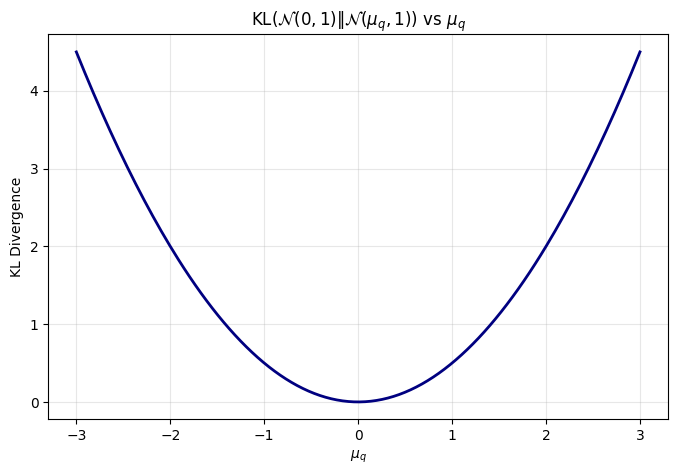

In [7]:
import matplotlib.pyplot as plt

mu_p = 0
sigma_p = 1
sigma_q = 1

# Range of mu_q values
mu_q_vals = np.linspace(-3, 3, 200)

# Compute KL for each mu_q
kl_vals = [kl_gaussian(mu_p, sigma_p, mu_q, sigma_q) for mu_q in mu_q_vals]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(mu_q_vals, kl_vals, color='navy', lw=2)
plt.title(r"KL$(\mathcal{N}(0,1)\|\mathcal{N}(\mu_q,1))$ vs $\mu_q$")
plt.xlabel(r"$\mu_q$")
plt.ylabel("KL Divergence")
plt.grid(True, alpha=0.3)
plt.show()

## 3. Non-Negativity of KL Divergence

**Gibbs’ Inequality**:  
$D_{\text{KL}}(P \,\|\, Q) \geq 0$

with equality if and only if $P = Q$.  
This means the "distance" is never negative.

Intuition: if you approximate $P$ with $Q$, you can never do better than the true distribution.


In [8]:
# Quick numerical experiment
p = np.array([0.4, 0.6])
q = np.array([0.5, 0.5])
kl = np.sum(p * np.log(p/q))
kl


np.float64(0.020135513550688863)

### Exercise 3
- Construct two different discrete distributions $P$ and $Q$.  
- Compute ${\text{KL}}(P \,\|\, Q)$ and ${\text{KL}}(Q \,\|\, P)$.  
- Verify that both are ≥ 0.  
- When do you get $\text{KL} = 0$?


In [13]:
import numpy as np

P = np.array([0.7, 0.2, 0.1])
Q = np.array([0.4, 0.4, 0.2])

def kl_divergence(P, Q):
    return np.sum(P * np.log(P / Q))

kl_pq = kl_divergence(P, Q)
kl_qp = kl_divergence(Q, P)

print("KL(P‖Q) =", kl_pq)
print("KL(Q‖P) =", kl_qp)


KL(P‖Q) = 0.1837868973868122
KL(Q‖P) = 0.19204199316179812


KL = 0 iff P == Q

## 4. KL Divergence and Maximum Likelihood Estimation

Suppose data is generated from distribution P, and we fit model Qθ.  

- MLE maximizes likelihood:   
  $\theta^* = \arg \max_\theta \sum \log q_\theta(x_i)$
- Equivalent to minimizing:  
  $D_{\text{KL}}(P \,\|\, Q_\theta)$

Thus, **MLE is KL minimization**: we make our model Qθ as close as possible to the true distribution P.


### Exercise 4
Explain in your own words:
- Why minimizing ${\text{KL}}(P \,\|\, Q)$ is the same as maximizing likelihood.  
- Why this interpretation helps us understand model training.


Well, if KL is a measure of how different two sets are, then it makes intuitive sense that lowering the value (the degree of difference) would increase the likelihood.

This interpretation helps us see “minimizing  KL” in the light of better aligning our model with the true data.

## 5. Forward vs Reverse KL

- **Forward KL:** $D_{\text{KL}}(P \,\|\, Q)$  
  - Penalizes missing modes ($Q$ must cover all support of $P$).  
  - "Mode covering."

- **Reverse KL:** $D_{\text{KL}}(Q \,\|\, P)$  
  - Penalizes putting mass where $P$ has none.  
  - "Mode seeking."

This asymmetry explains why different algorithms (e.g. variational inference vs expectation propagation) behave differently.


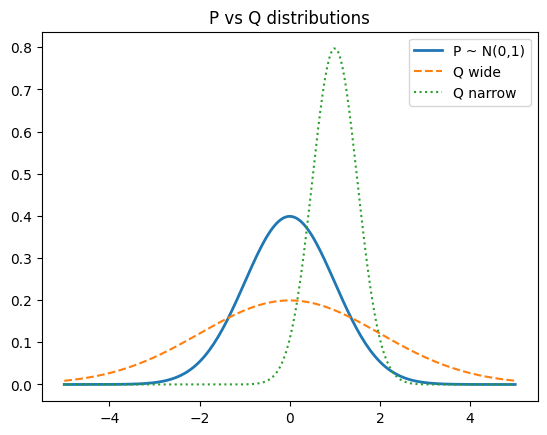

In [10]:
import scipy.stats as stats

x = np.linspace(-5, 5, 200)
p = stats.norm(0, 1).pdf(x)   # true distribution
q1 = stats.norm(0, 2).pdf(x)  # wide Q
q2 = stats.norm(1, 0.5).pdf(x) # narrow Q

plt.plot(x, p, label="P ~ N(0,1)", linewidth=2)
plt.plot(x, q1, label="Q wide", linestyle="--")
plt.plot(x, q2, label="Q narrow", linestyle=":")
plt.legend()
plt.title("P vs Q distributions")
plt.show()


### Exercise 5
1. Compute both ${\text{KL}}(P \,\|\, Q)$ and ${\text{KL}}(Q \,\|\, P)$ for $P=N(0,1)$, $Q=N(1,0.5)$.  
2. Which is larger? Why?  
3. In which case would forward KL be more appropriate? Reverse KL?


In [14]:
if kl_gaussian(0, 1, 1, .5) > kl_gaussian(1, 0.5, 0, 1):
  print("Forward KL is larger")
else:
  print("Reverse KL is larger")

Forward KL is larger


## 6. Reflection

### Exercise 6
Answer in 2–3 sentences each:

1. Why is KL divergence always non-negative?  
2. How does KL divergence connect to MLE?  
3. Why do forward and reverse KL behave differently?  


Your response here